In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('laptops_10.csv', encoding = 'latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


1.1 Изучите количество памяти с помощью matplotlib
1.2 Изучите стоимость ноутбуков с помощью matplotlib
1.3 Изучите вес ноутбуков с помощью matplotlib


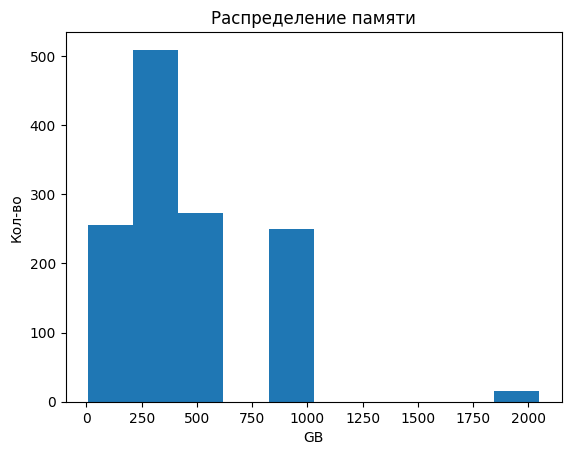

In [18]:
plt.hist(df['Memory_Amount']) # гистограмма
plt.xlabel('GB')
plt.ylabel('Кол-во')
plt.title('Распределение памяти');

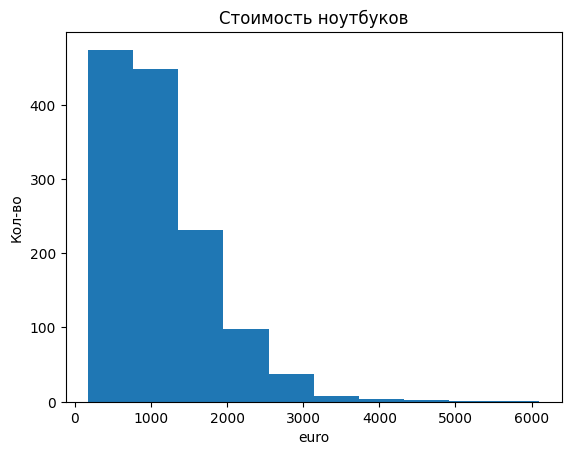

In [19]:
plt.hist(df['Price_euros'])
plt.xlabel('euro')
plt.ylabel('Кол-во')
plt.title('Стоимость ноутбуков');

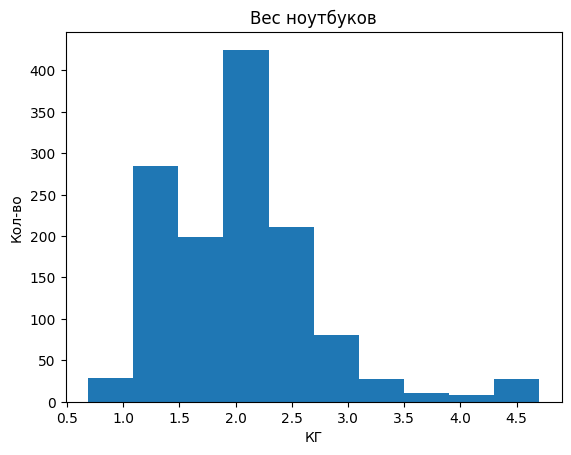

In [20]:
plt.hist(df['Weight'])
plt.xlabel('КГ')
plt.ylabel('Кол-во')
plt.title('Вес ноутбуков');

2.1 Изучите распределение типов носителя

2.2 Изучите распределение компаний производителей

2.3 Изучите распределение операционной системы

2.4 Изучите распределение компаний производителей CPU

In [21]:
data = df['Memory_Type'].value_counts() #считаем количество
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

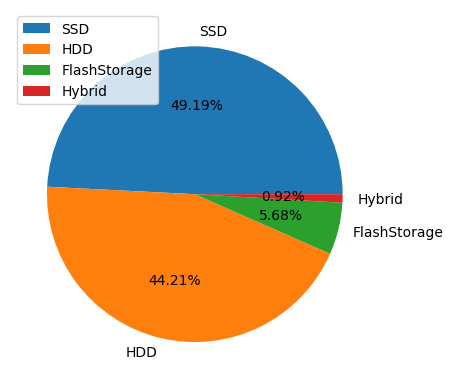

In [22]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')# data.values значения данных, labels=data.index подпись, %1.2f%% два знака процента после запятой
plt.legend(data.index);


компании производители

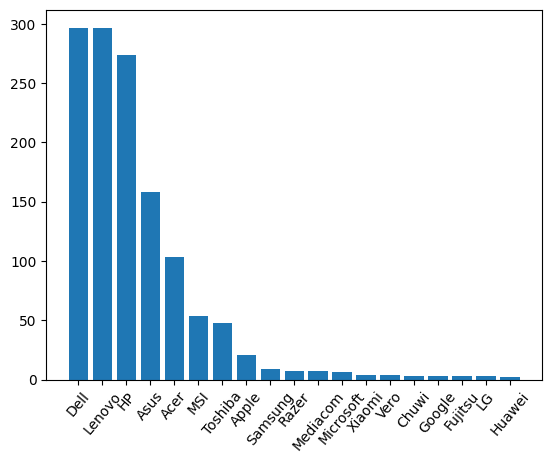

In [23]:
data = df['Company'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50);


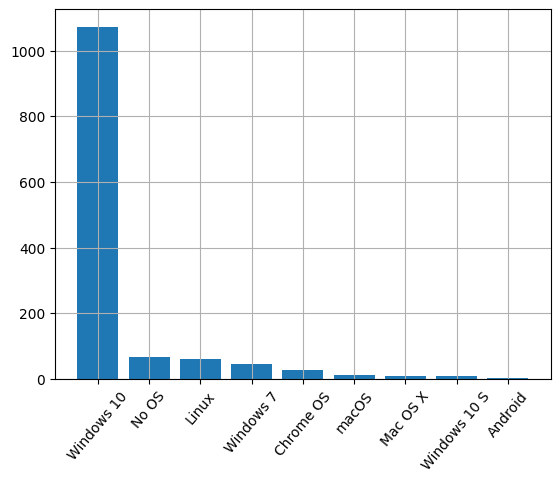

In [24]:
data = df['OpSys'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50)
plt.grid(); #plt.grid() сетка

In [25]:
data = df['Cpu_Company'].value_counts()
data

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

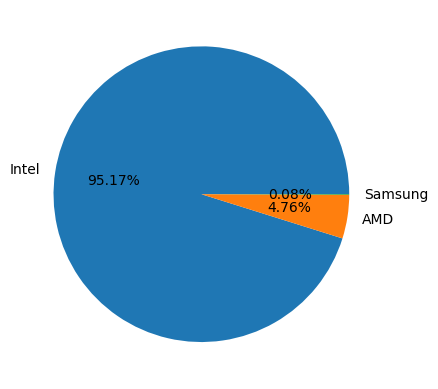

In [26]:
#data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%');


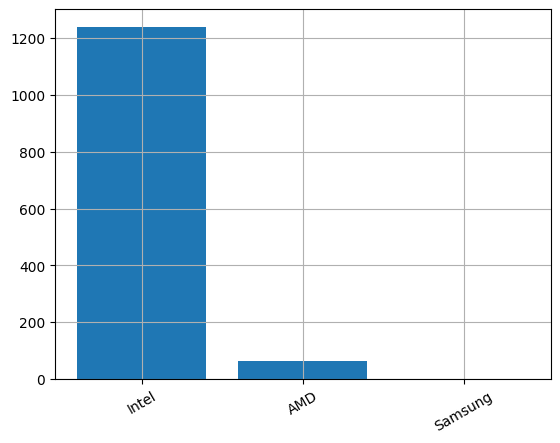

In [27]:
data = df['Cpu_Company'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=30);
plt.grid();


In [28]:
df[df['Cpu_Company'] == 'Samsung']

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53 2.0GHz,4GB,ARM Mali T860 MP4,Chrome OS,1.15,659.0,Samsung,32,FlashStorage


Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах

3.2 Постройте график в относительных величинах

In [39]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company']) # группируем по производителям ноутов и процев
data = data.drop(columns=['Samsung']).reset_index() #убираем самсунг
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


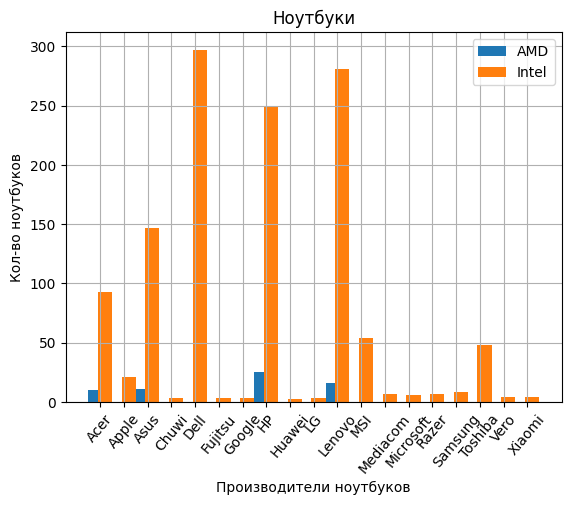

In [40]:
import numpy as np

n_ticks = np.arange(len(data)) #создать массив длинной в нашу дату

plt.bar(n_ticks - 0.2, data['AMD'], width=0.6)
plt.bar(n_ticks + 0.2, data['Intel'], width=0.6)

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50); #подписать столбцы

In [41]:
n_ticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

НАложим друг на друга

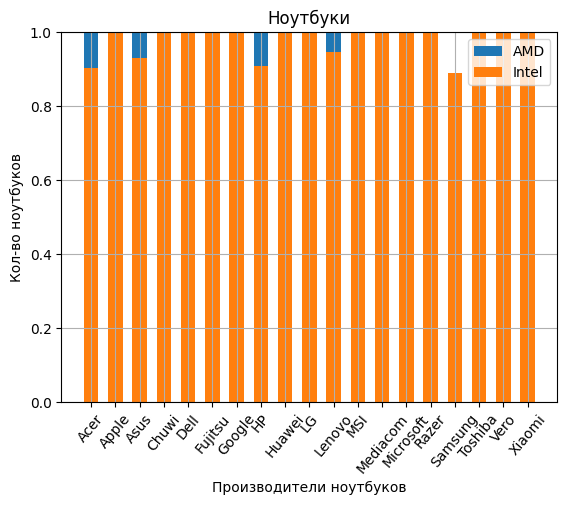

In [42]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index').reset_index()

data


import numpy as np


plt.bar(data['Company'], data['AMD'], width=0.6, bottom=data['Intel'])
plt.bar(data['Company'], data['Intel'], width=0.6)

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(rotation=50);

In [43]:
data

Cpu_Company,Company,AMD,Intel,Samsung
0,Acer,0.097087,0.902913,0.000000
1,Apple,0.000000,1.000000,0.000000
2,Asus,0.069620,0.930380,0.000000
3,Chuwi,0.000000,1.000000,0.000000
4,Dell,0.000000,1.000000,0.000000
5,Fujitsu,0.000000,1.000000,0.000000
6,Google,0.000000,1.000000,0.000000
7,HP,0.091241,0.908759,0.000000
8,Huawei,0.000000,1.000000,0.000000
9,LG,0.000000,1.000000,0.000000


4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

Для анализа зависимостей используем боксплот

<Axes: xlabel='Price_euros', ylabel='Company'>

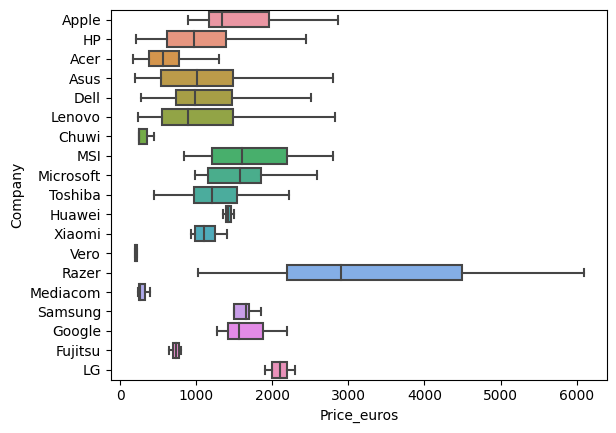

In [44]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Company'], showfliers=False)
#plt.xticks(rotation=50);

<Axes: xlabel='Price_euros', ylabel='Memory_Type'>

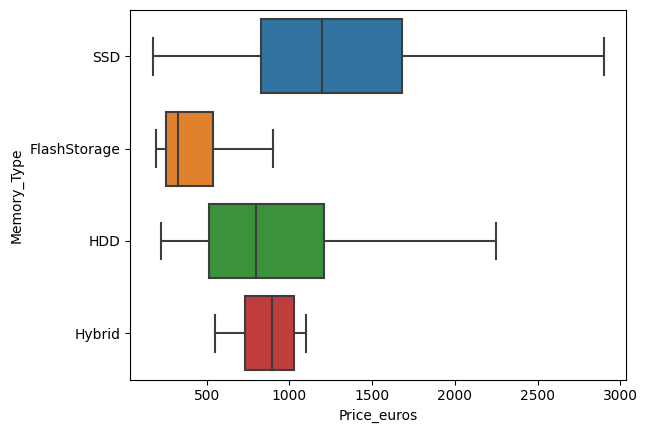

In [45]:

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], showfliers=False)
#plt.xticks(rotation=50);

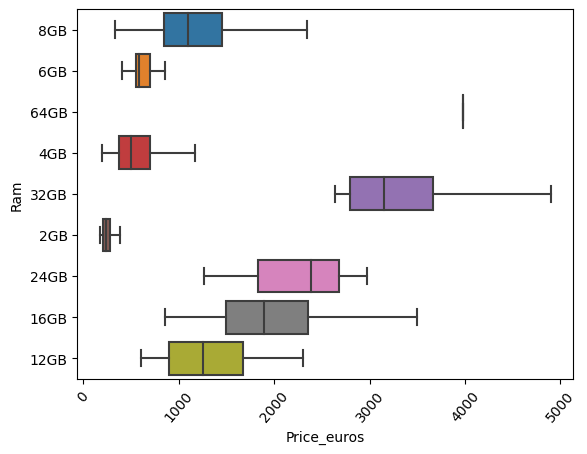

In [50]:
data = df.sort_values(by='Ram', ascending=False) #не сортирует так как значение строчное
sns.boxplot(x=data['Price_euros'], y=data['Ram'], showfliers=False)
plt.xticks(rotation=50);

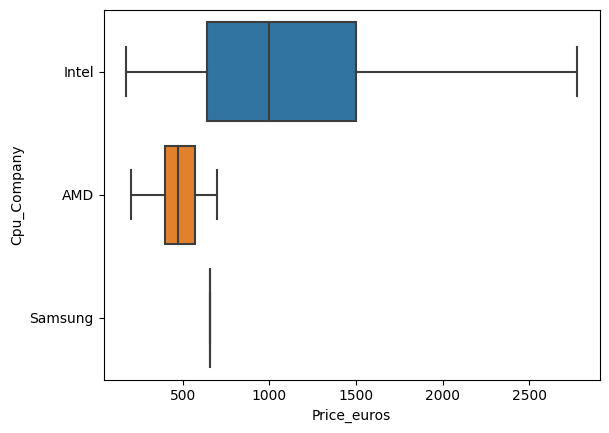

In [52]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False);

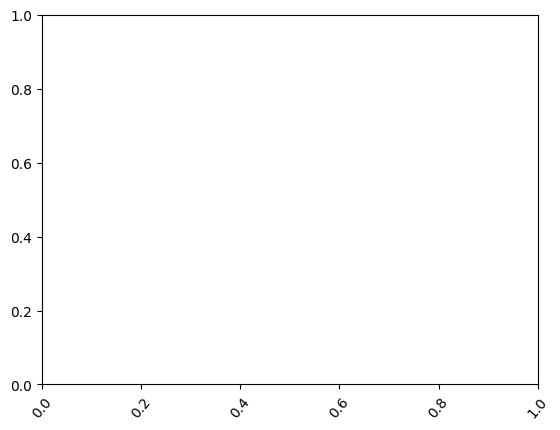

In [35]:
plt.xticks(rotation=50);

Постройте матрицу корреляций для таблицы

In [36]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1) #округлить значения полученные после функции корреляции
corr_matrix

/var/folders/3s/9xxqj9854x5d63mb_dq115ch0000gn/T/ipykernel_3055/4071305822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.1,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.1,0.2,1.0,-0.1
Memory_Amount,0.3,0.2,-0.1,1.0


sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

sns.heatmap(corr_matrix - ресуем наши данные

annot=True - подписываем значения

linewidths=.5 - рвзделяем ячейки линиями

cmap='coolwarm' - изменение цвета

<Axes: >

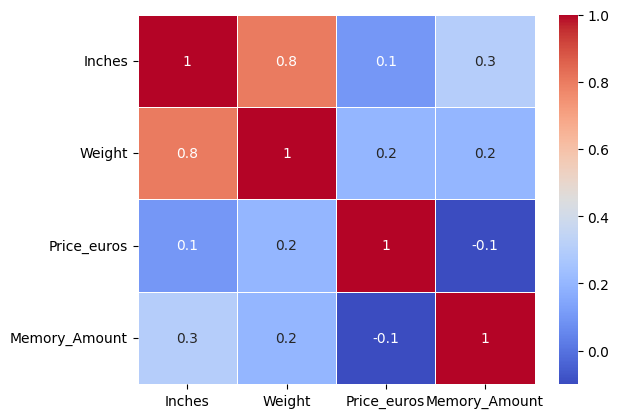

In [37]:
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

